# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

import xgboost as xgb

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [22]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
scaler = StandardScaler()

X = diabetes_df.drop("Outcome", axis=1)
y = diabetes_df["Outcome"]

X_train_unscaled, x_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train_unscaled)
x_test = scaler.transform(x_test_unscaled)

In [24]:
base_estimator = DecisionTreeClassifier(max_depth=1)

ada_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

param_grid_ada = {
    'n_estimators': [100, 150, 200]
}

ada_model_gs = GridSearchCV(estimator=ada_model, param_grid=param_grid_ada, cv=3)

ada_model_gs.fit(X_train, y_train)

ada_pred = ada_model_gs.predict(x_test)

ada_accuracy = accuracy_score(y_test, ada_pred)
print(f"AdaBoost Accuracy: {ada_accuracy:.3f}")

AdaBoost Accuracy: 0.747


In [25]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

param_grid_gb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5]
}

gb_model_gs = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3)

gb_model_gs.fit(X_train, y_train)

gb_pred = gb_model_gs.predict(x_test)

gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.3f}")


Gradient Boosting Accuracy: 0.753


In [26]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5]
}

xgb_model_gs = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3)

xgb_model_gs.fit(X_train, y_train)

xgb_pred = xgb_model_gs.predict(x_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.3f}")

XGBoost Accuracy: 0.721


Спочатку, я вибрав датасет де було 7 фічей, та всього 700 точок. І моделі бустингу показали не дуже вражаючий результат, який я очікував. Я зрозумів, що для таких моделей цих даних просто недостатньо, і вона перенавчається. Хоча, може бути і інша причина в якості даних. Тому, я прийняв рішення змінити датасет на трішки ширший, 18 фічей та 4000 точок. І тепер спробуємо, що покажуть моделі в такому випадку.

In [27]:
new_diabetes_df = pd.read_csv("diabetes_2.csv")
new_diabetes_df

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.000000,3.000000,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.000000,1.000000,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.000000,3.000000,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.000000,3.000000,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.000000,3.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,54,1,23.4,126,75,6.82,5.00,1.50,1.24,2.98,8.0,3.50,77.0,6.70,1.000000,3.000000,0,1
4299,50,2,22.3,115,84,5.32,4.37,2.09,1.37,2.29,21.2,4.40,47.3,6.55,4.860753,4.860753,0,1
4300,67,1,24.6,138,81,4.85,3.89,1.38,1.14,2.17,18.1,4.73,70.6,6.80,3.000000,3.000000,0,1
4301,60,2,29.0,101,60,6.70,5.91,1.29,1.73,2.85,18.9,7.33,50.2,7.00,3.000000,3.000000,0,1


In [34]:
scaler = StandardScaler()

X = new_diabetes_df.drop("Diabetes", axis=1)
y = new_diabetes_df["Diabetes"]

X_train_unscaled, x_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(x_test_unscaled)

In [35]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test):
    train_errors, test_errors = [], []
    for m in range(1, 200):
        model.n_estimators = m
        model.fit(X_train, y_train)
        
        y_train_predict = model.predict(X_train)
        y_test_predict = model.predict(X_test)
        
        train_errors.append(1 - accuracy_score(y_train, y_train_predict))
        test_errors.append(1 - accuracy_score(y_test, y_test_predict))
    
    plt.plot(np.arange(1, 200), train_errors, label='Training Error')
    plt.plot(np.arange(1, 200), test_errors, label='Test Error')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Error Rate')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

AdaBoost Learning Curve:


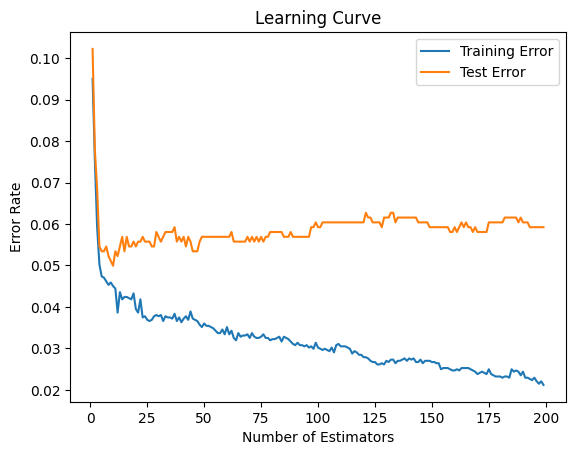

AdaBoost Best Accuracy: 0.941
Gradient Boosting Learning Curve:


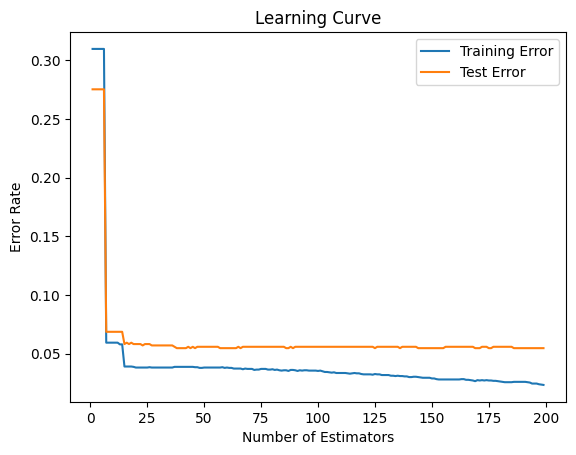

Gradient Boosting Best Accuracy: 0.945
XGBoost Learning Curve:


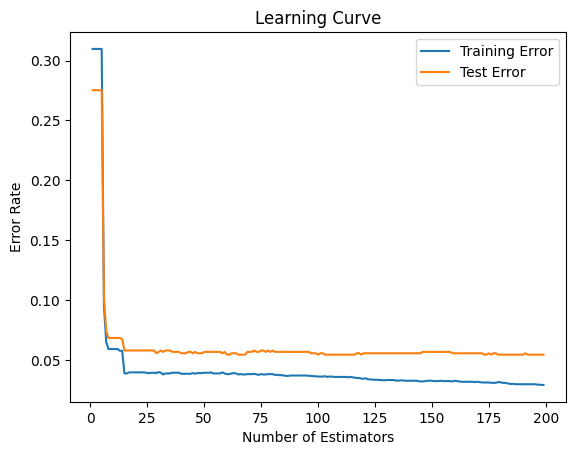

XGBoost Best Accuracy: 0.945


In [39]:
#-----------------------------------------------------------Ada Boost-----------------------------------------------------------

base_estimator = DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

param_grid_ada = {
    'n_estimators': [50, 100, 150]
}

ada_model_gs = GridSearchCV(estimator=ada_model, param_grid=param_grid_ada, cv=3)
ada_model_gs.fit(X_train, y_train)

best_ada_model = ada_model_gs.best_estimator_

print("AdaBoost Learning Curve:")
plot_learning_curve(best_ada_model, X_train, y_train, X_test, y_test)

ada_pred = best_ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
print(f"AdaBoost Best Accuracy: {ada_accuracy:.3f}")

#-----------------------------------------------------------Gradient Boosting----------------------------------------------------

gb_model = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gb_model_gs = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3)
gb_model_gs.fit(X_train, y_train)

best_gb_model = gb_model_gs.best_estimator_

print("Gradient Boosting Learning Curve:")
plot_learning_curve(best_gb_model, X_train, y_train, X_test, y_test)

gb_pred = best_gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Best Accuracy: {gb_accuracy:.3f}")

#-----------------------------------------------------------XGBoost---------------------------------------------------------------


xgb_model = xgb.XGBClassifier(random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

xgb_model_gs = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3)
xgb_model_gs.fit(X_train, y_train)

best_xgb_model = xgb_model_gs.best_estimator_

print("XGBoost Learning Curve:")
plot_learning_curve(best_xgb_model, X_train, y_train, X_test, y_test)

xgb_pred = best_xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Best Accuracy: {xgb_accuracy:.3f}")

In [40]:
#-----------------------------------------------------------Gradient Boosting-------------------------------------------------------

gb_model_reg = GradientBoostingClassifier(random_state=42)

param_grid_gb_reg = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8],
    'min_samples_split': [2],
}

gb_model_gs_reg = GridSearchCV(estimator=gb_model_reg, param_grid=param_grid_gb_reg, cv=3)
gb_model_gs_reg.fit(X_train, y_train)

gb_pred_reg = gb_model_gs_reg.predict(X_test)
gb_accuracy_reg = accuracy_score(y_test, gb_pred_reg)

print(f"Gradient Boosting Accuracy with Regularization: {gb_accuracy_reg:.3f}")

#-----------------------------------------------------------XGBoost---------------------------------------------------------------

xgb_model_reg = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, 
                                   reg_alpha=1,
                                   reg_lambda=1)

param_grid_xgb_reg = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5],
    'reg_alpha': [0, 0.1, 1], 
    'reg_lambda': [0, 1],
}

xgb_model_gs_reg = GridSearchCV(estimator=xgb_model_reg, param_grid=param_grid_xgb_reg, cv=3)
xgb_model_gs_reg.fit(X_train, y_train)

xgb_pred_reg = xgb_model_gs_reg.predict(X_test)
xgb_accuracy_reg = accuracy_score(y_test, xgb_pred_reg)

print(f"XGBoost Accuracy with Regularization: {xgb_accuracy_reg:.3f}")

print("\nAccuracy Comparison:")
print(f"Gradient Boosting without Regularization: {gb_accuracy:.3f}")
print(f"Gradient Boosting with Regularization: {gb_accuracy_reg:.3f}")
print(f"XGBoost without Regularization: {xgb_accuracy:.3f}")
print(f"XGBoost with Regularization: {xgb_accuracy_reg:.3f}")

Gradient Boosting Accuracy with Regularization: 0.945
XGBoost Accuracy with Regularization: 0.944

Accuracy Comparison:
Gradient Boosting without Regularization: 0.945
Gradient Boosting with Regularization: 0.945
XGBoost without Regularization: 0.945
XGBoost with Regularization: 0.944


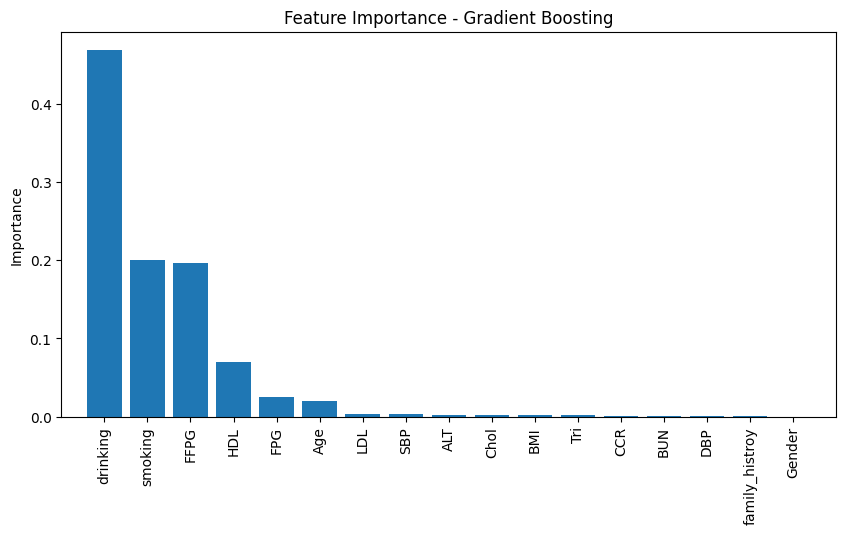

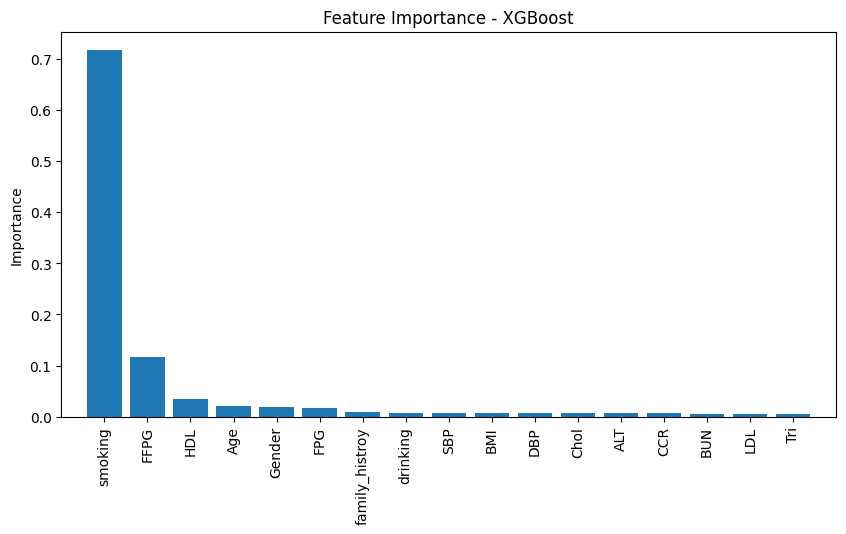

In [42]:
feature_names = new_diabetes_df.drop('Diabetes', axis=1).columns.tolist()

gb_importances = gb_model_gs_reg.best_estimator_.feature_importances_
gb_indices = np.argsort(gb_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance - Gradient Boosting")
plt.bar(range(X_train.shape[1]), gb_importances[gb_indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[gb_indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("Importance")
plt.show()

xgb_importances = xgb_model_gs_reg.best_estimator_.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance - XGBoost")
plt.bar(range(X_train.shape[1]), xgb_importances[xgb_indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[xgb_indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("Importance")
plt.show()


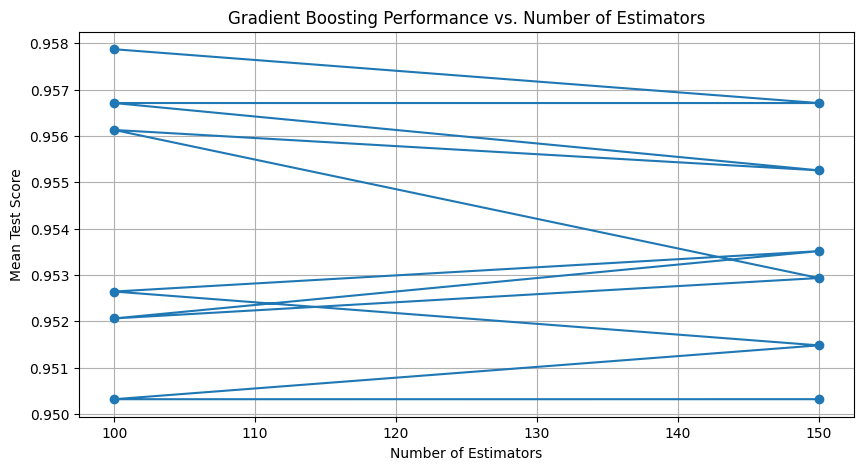

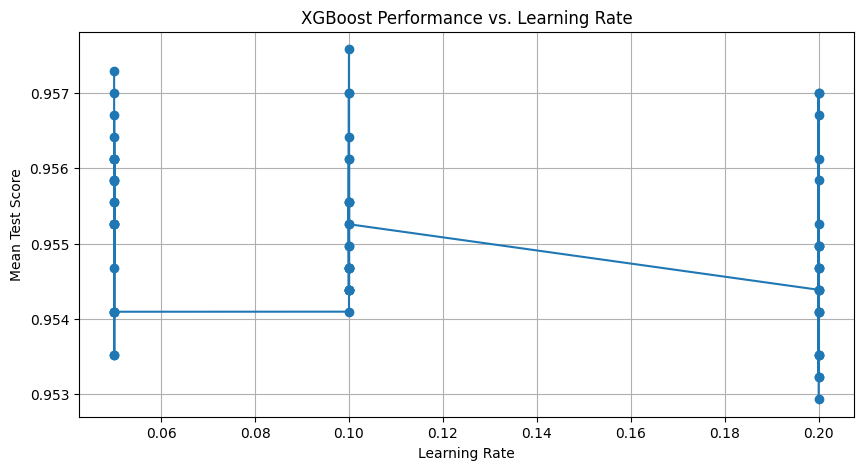

In [43]:
results_gb = gb_model_gs_reg.cv_results_
plt.figure(figsize=(10, 5))
plt.title("Gradient Boosting Performance vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test Score")
plt.plot(results_gb['param_n_estimators'], results_gb['mean_test_score'], marker='o')
plt.grid()
plt.show()

results_xgb = xgb_model_gs_reg.cv_results_
plt.figure(figsize=(10, 5))
plt.title("XGBoost Performance vs. Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Mean Test Score")
plt.plot(results_xgb['param_learning_rate'], results_xgb['mean_test_score'], marker='o')
plt.grid()
plt.show()
